In [5]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# for visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use('fivethirtyeight')

# to visualize missing data
import missingno as msno

In [6]:
plt.rcParams['figure.figsize'] = (12,8)

In [7]:
df = pd.read_csv(r'C:\Users\morev\Music\Sem6-DYP\Data Science\fifa_eda.csv')


In [8]:
df.shape

(18207, 18)

In [9]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [10]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [12]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [13]:
# fill missing values for continuous variables for proper data visualization
df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['ID'].fillna(8, inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

In [14]:
df.fillna(0, inplace = True)

In [15]:
def country(x):
    return df[df['Nationality'] == x].head()


# prepare dataset for Indian players
country('India')

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
8605,190939,S. Chhetri,33,India,67,67,No Club,0.0,0.0,Right,1.0,3.0,LS,2016,2019,5.583333,154.0,4585.060806
10011,223763,S. Jhingan,24,India,65,71,No Club,0.0,0.0,Right,1.0,2.0,RCB,2016,2019,6.166667,163.0,4585.060806
12598,217225,J. Lalpekhlua,27,India,63,64,No Club,0.0,0.0,Right,1.0,2.0,RS,2016,2019,5.750000,165.0,4585.060806
12811,225213,G. Singh Sandhu,26,India,63,68,No Club,0.0,0.0,Right,1.0,1.0,GK,2016,2019,6.333333,198.0,4585.060806
13508,238205,A. Edathodika,31,India,62,62,No Club,0.0,0.0,Left,1.0,2.0,LCB,2016,2019,6.000000,172.0,4585.060806


In [16]:
df['Preferred Foot'].value_counts()

Preferred Foot
Right    13996
Left      4211
Name: count, dtype: int64

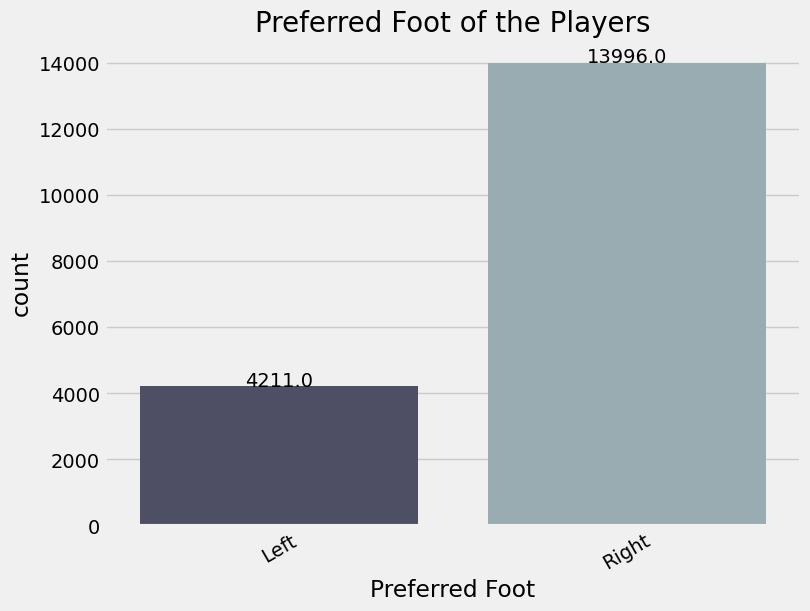

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=df['Preferred Foot'], data=df, palette = 'bone')
graph.set_title('Preferred Foot of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [18]:
df['Preferred Foot'].value_counts()/len(df)

Preferred Foot
Right    0.768715
Left     0.231285
Name: count, dtype: float64

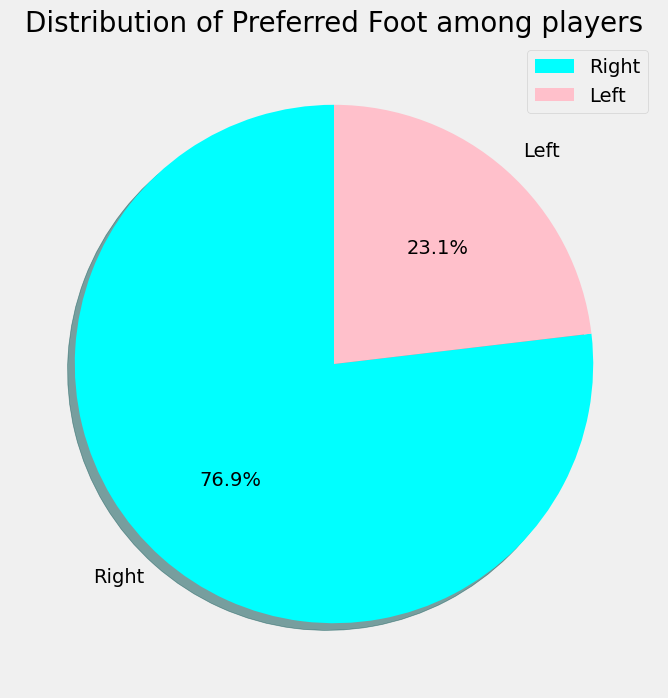

In [19]:
labels = df['Preferred Foot'].value_counts().index
size = df['Preferred Foot'].value_counts()
colors=['cyan','pink']
plt.pie(size, labels = labels, colors = colors, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Preferred Foot among players', fontsize = 20)
plt.legend()
plt.show()

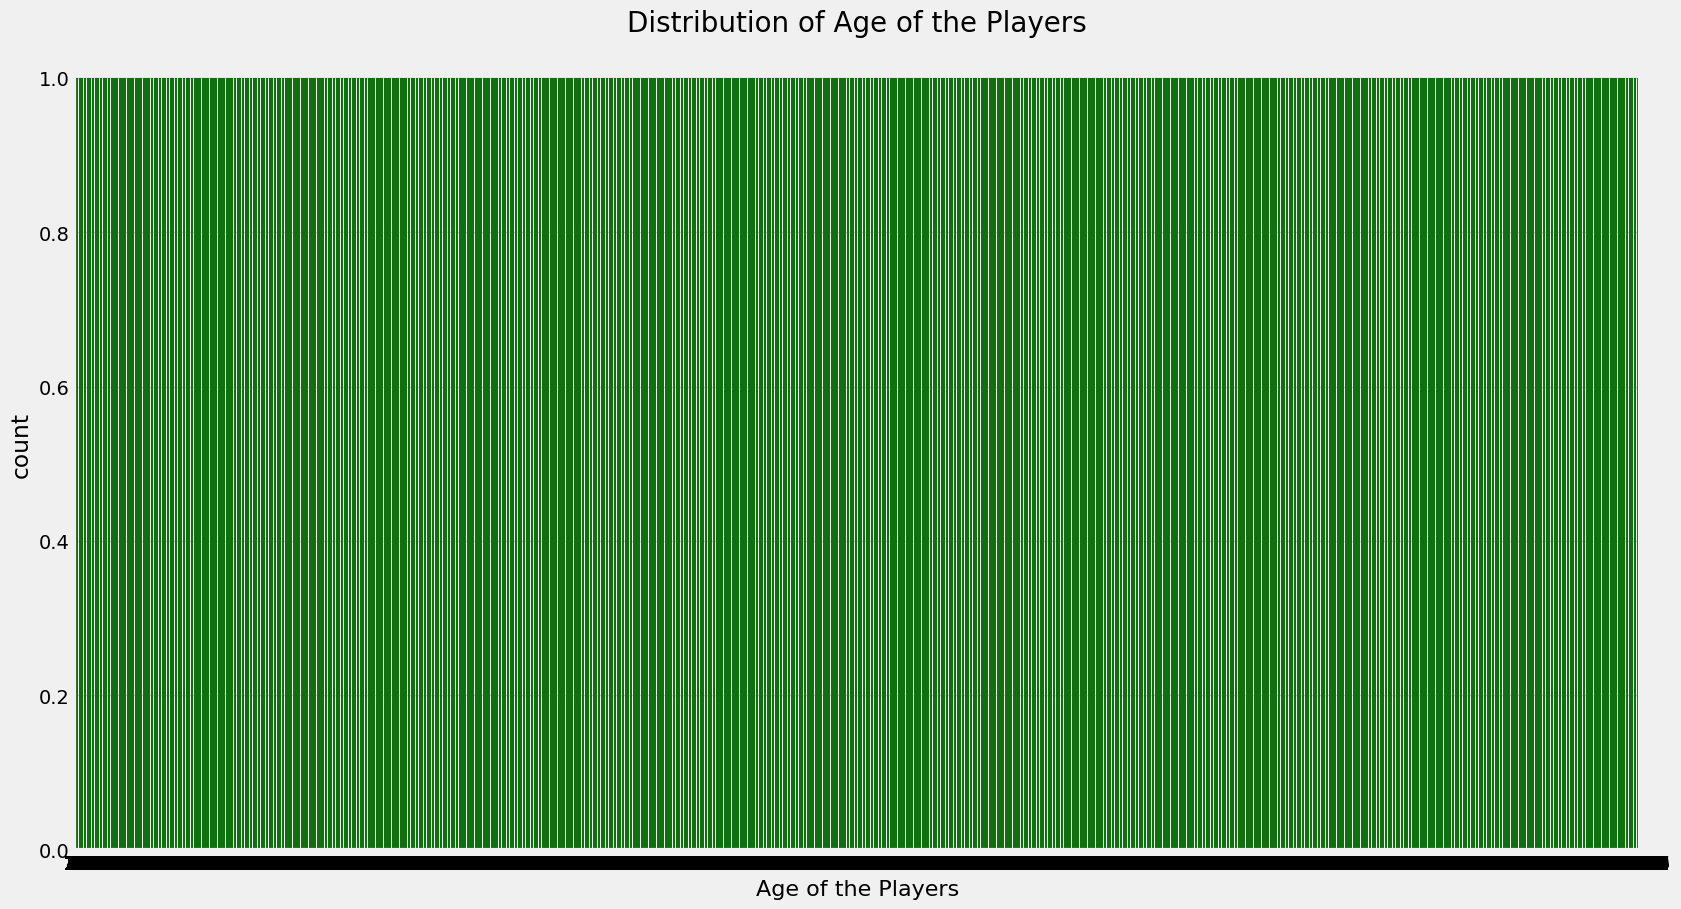

In [20]:
x = df['Age']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Distribution of Age of the Players', fontsize = 20)
plt.show()

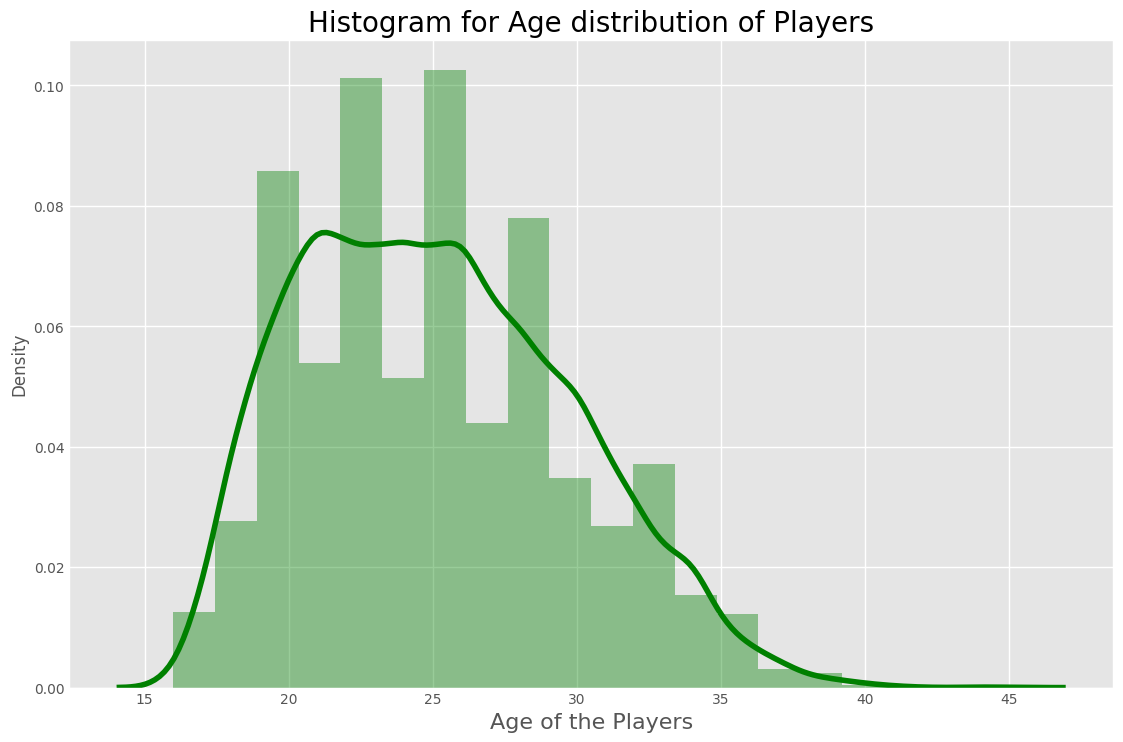

In [22]:
x = df['Age']
plt.figure(figsize = (12, 8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 20, kde = True, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Histogram for Age distribution of Players', fontsize = 20)
plt.show()

In [23]:
df['International Reputation'].value_counts()

International Reputation
1.0    16580
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

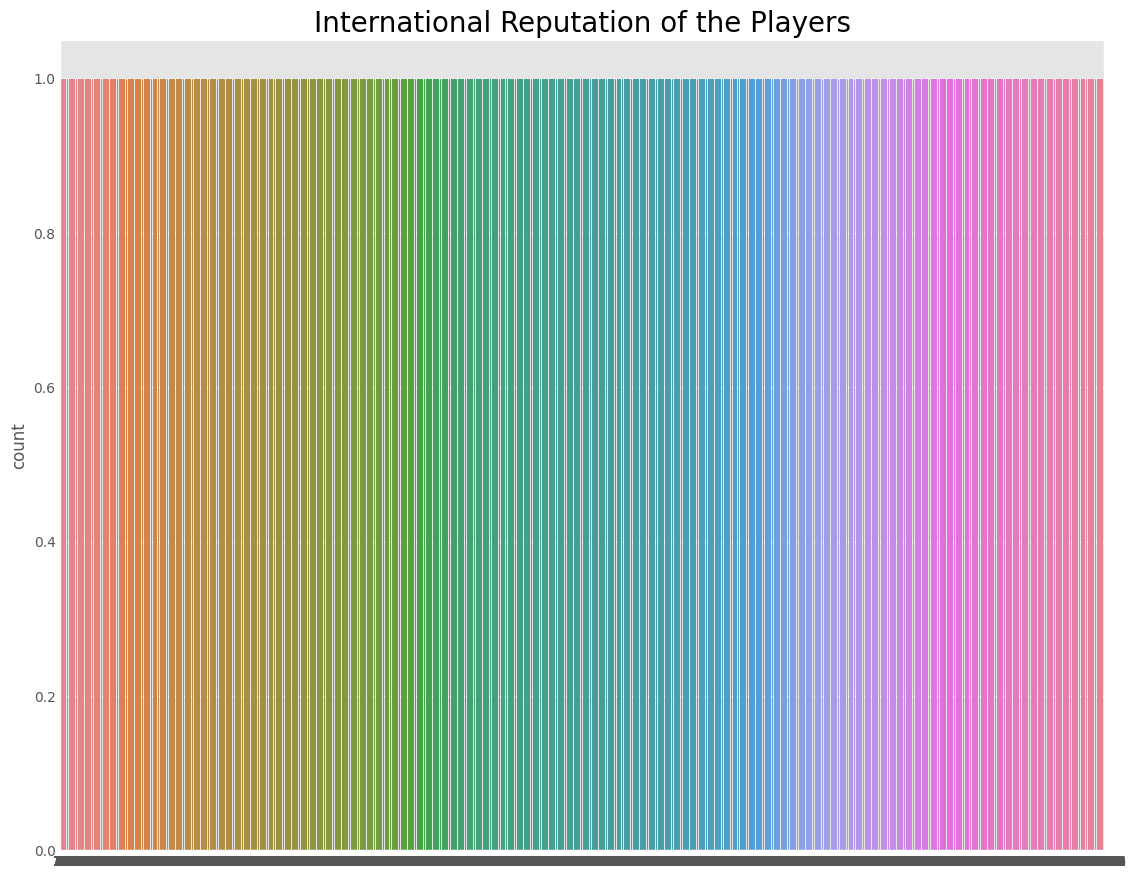

In [24]:
plt.figure(figsize=(12,10))
sns.countplot(df['International Reputation'], palette = 'husl')
plt.title('International Reputation of the Players', fontsize = 20)
plt.show()

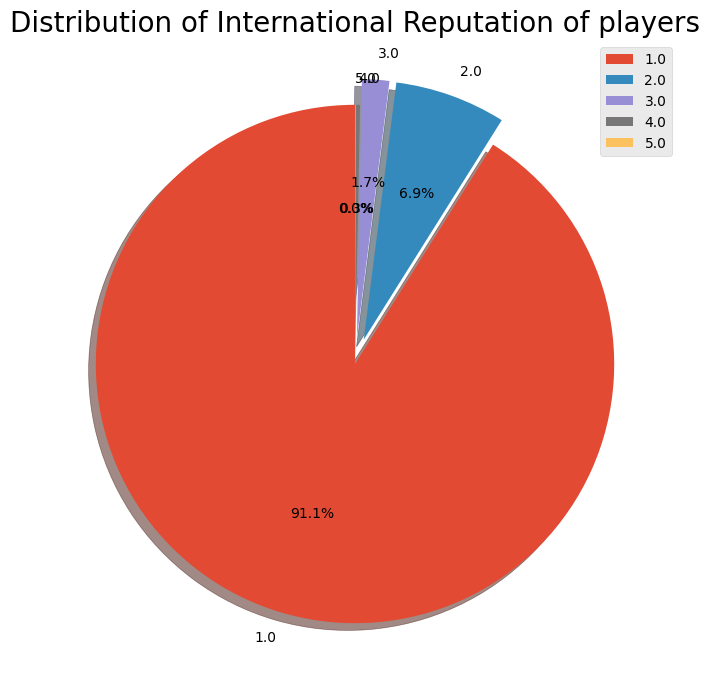

In [26]:
labels = df['International Reputation'].value_counts().index
size = df['International Reputation'].value_counts()
explode = [0, 0.1, 0.1, 0, 0]
plt.pie(size, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of International Reputation of players', fontsize = 20)
plt.legend()
plt.show()

In [27]:
df.groupby('Preferred Foot')['International Reputation'].value_counts()

Preferred Foot  International Reputation
Left            1.0                          3839
                2.0                           290
                3.0                            66
                4.0                            15
                5.0                             1
Right           1.0                         12741
                2.0                           971
                3.0                           243
                4.0                            36
                5.0                             5
Name: count, dtype: int64

In [28]:
df['Skill Moves'].value_counts()

Skill Moves
2.0    8613
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: count, dtype: int64

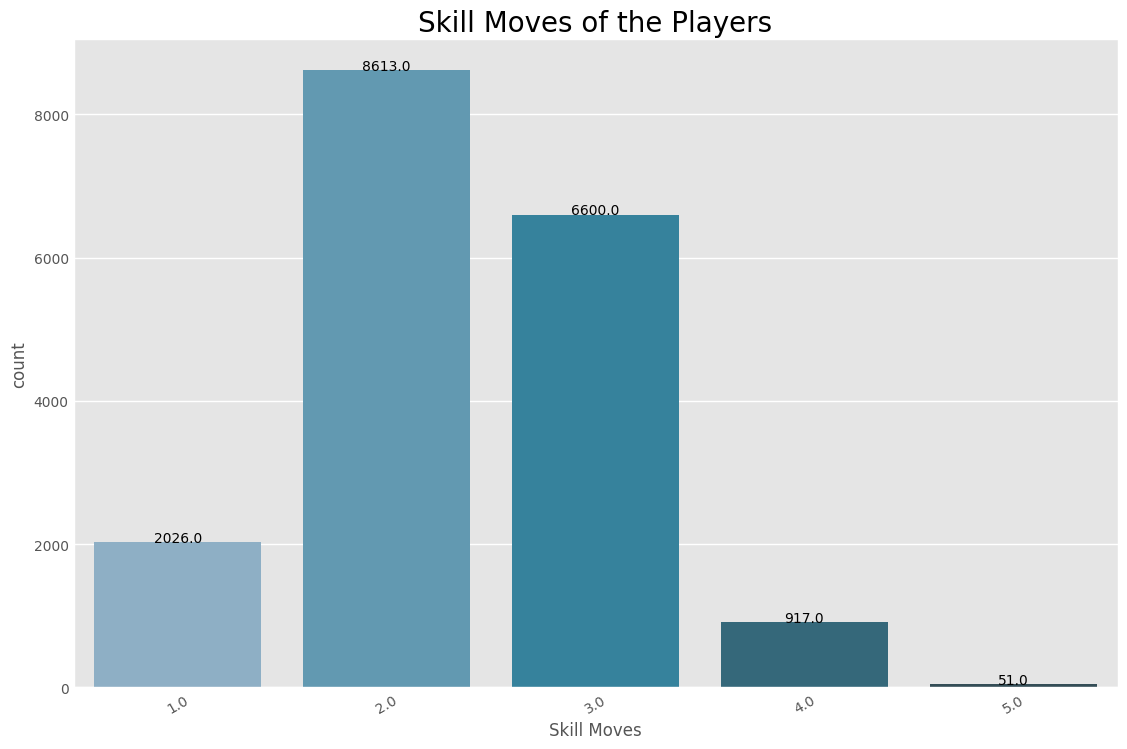

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, palette = 'PuBuGn_d')
graph.set_title('Skill Moves of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


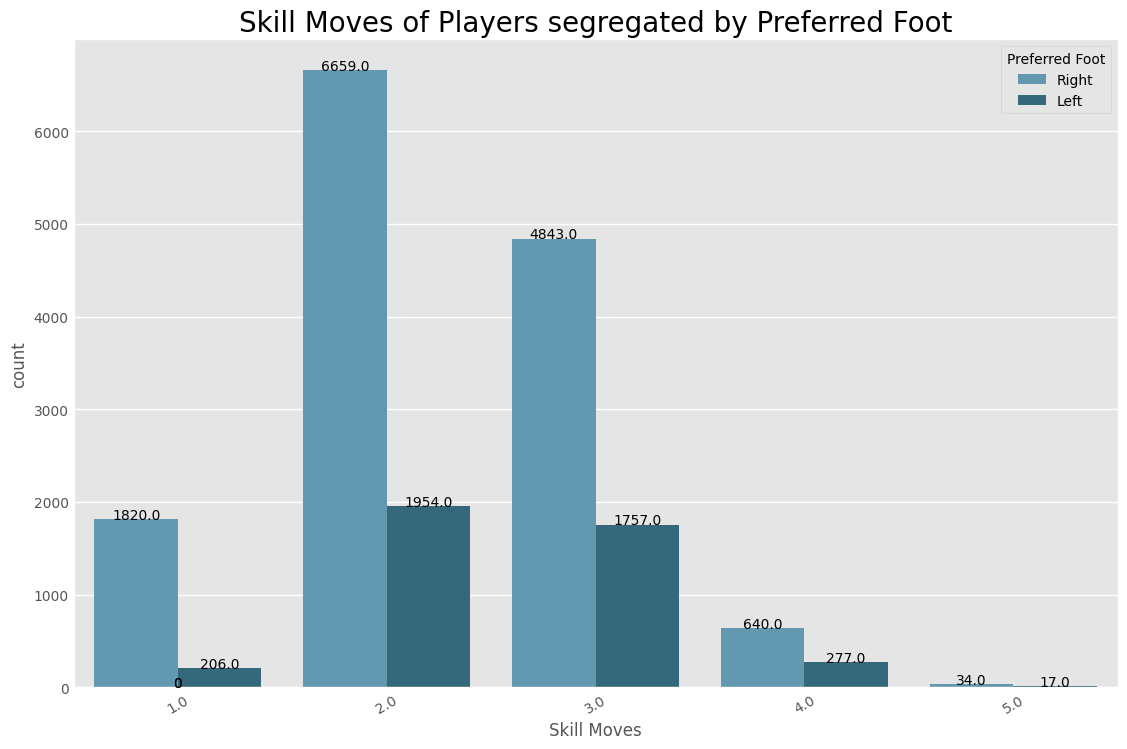

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, hue='Preferred Foot', palette = 'PuBuGn_d')
graph.set_title('Skill Moves of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    

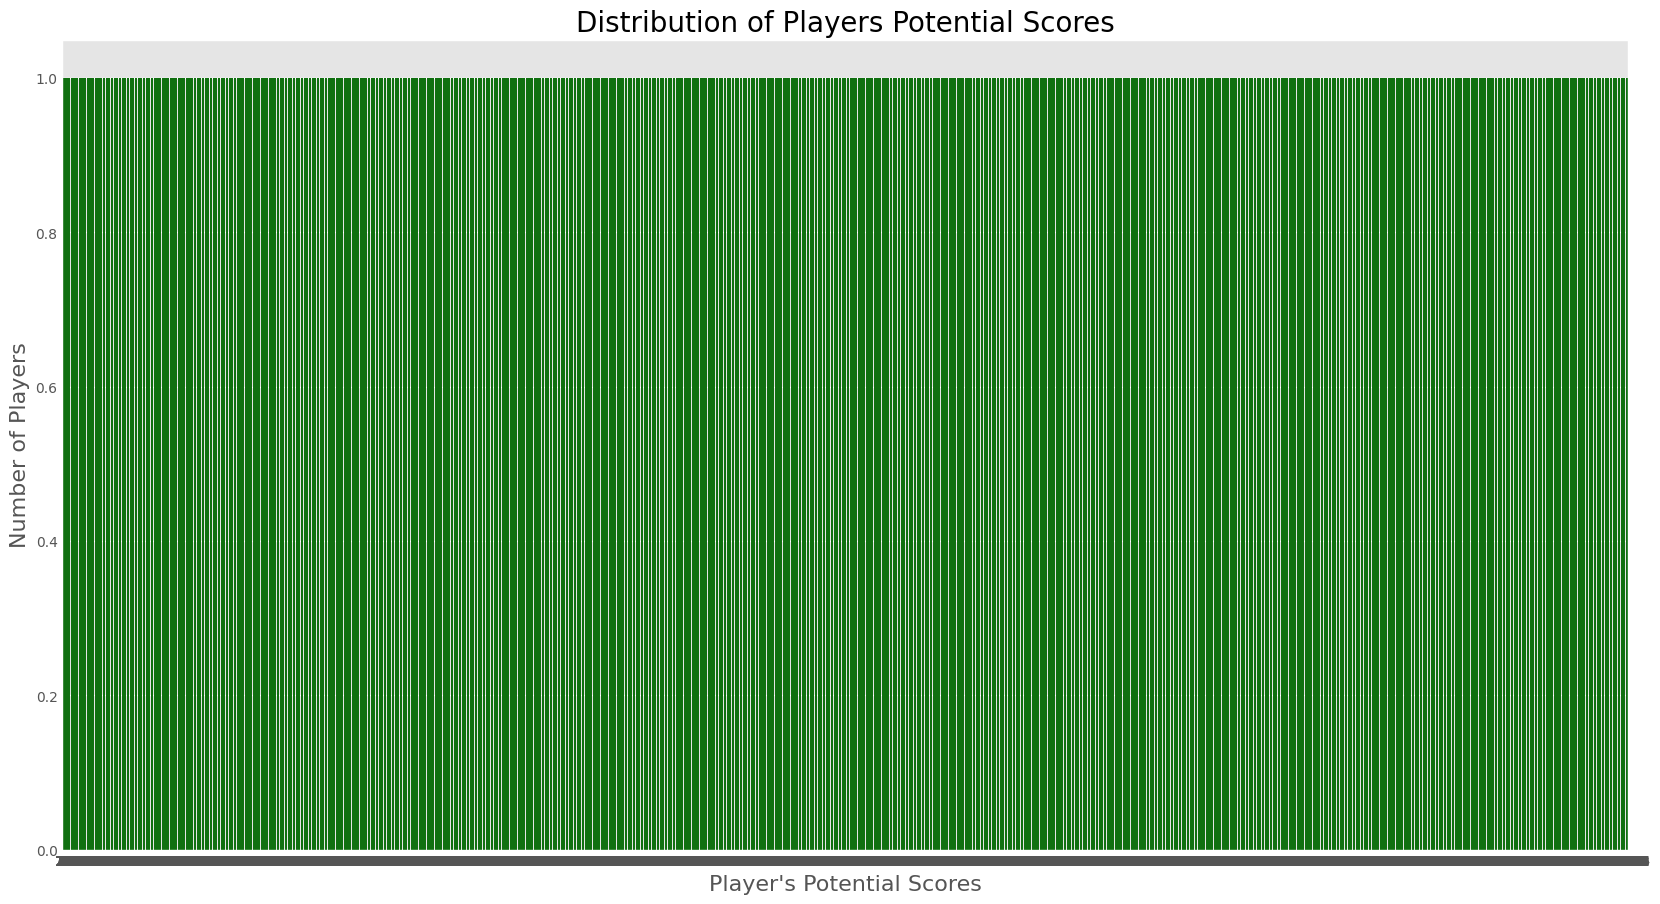

In [31]:
x = df['Potential']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, color='g')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Potential Scores', fontsize = 20)
plt.show()


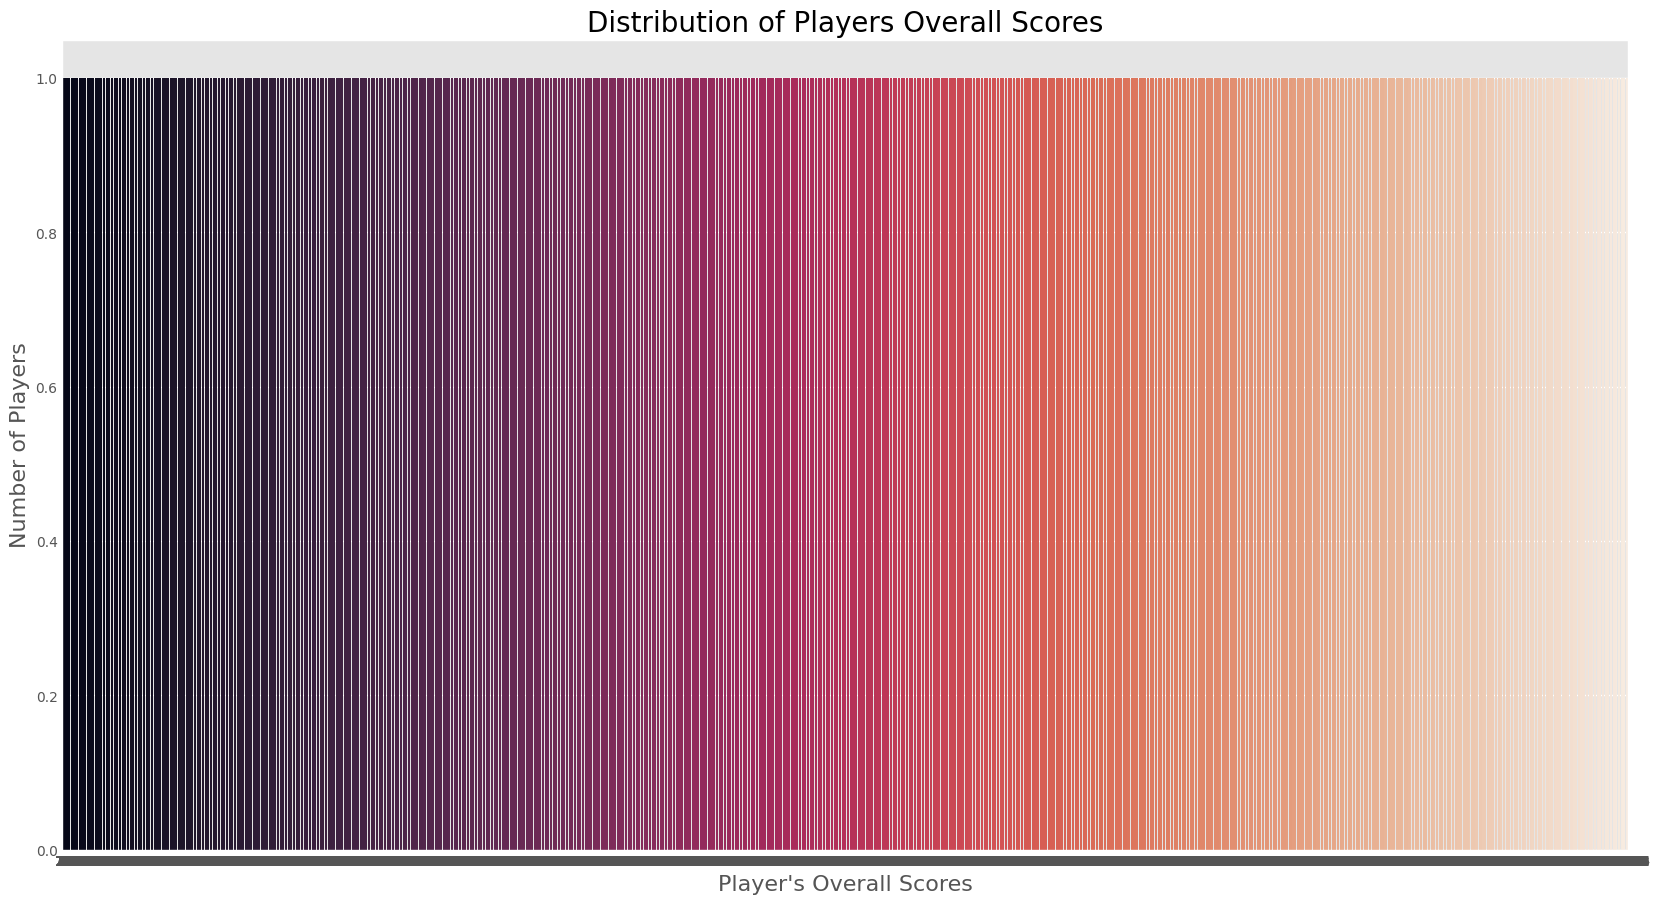

In [32]:
x = df['Overall']
plt.figure(figsize=(18,10))
ax = sns.countplot(x, palette='rocket')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Overall Scores', fontsize = 20)
plt.show()


In [33]:
df['Position'].value_counts()

Position
ST     2154
GK     2027
CB     1779
CM     1395
LB     1372
RB     1291
RM     1127
LM     1095
CAM     959
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: count, dtype: int64

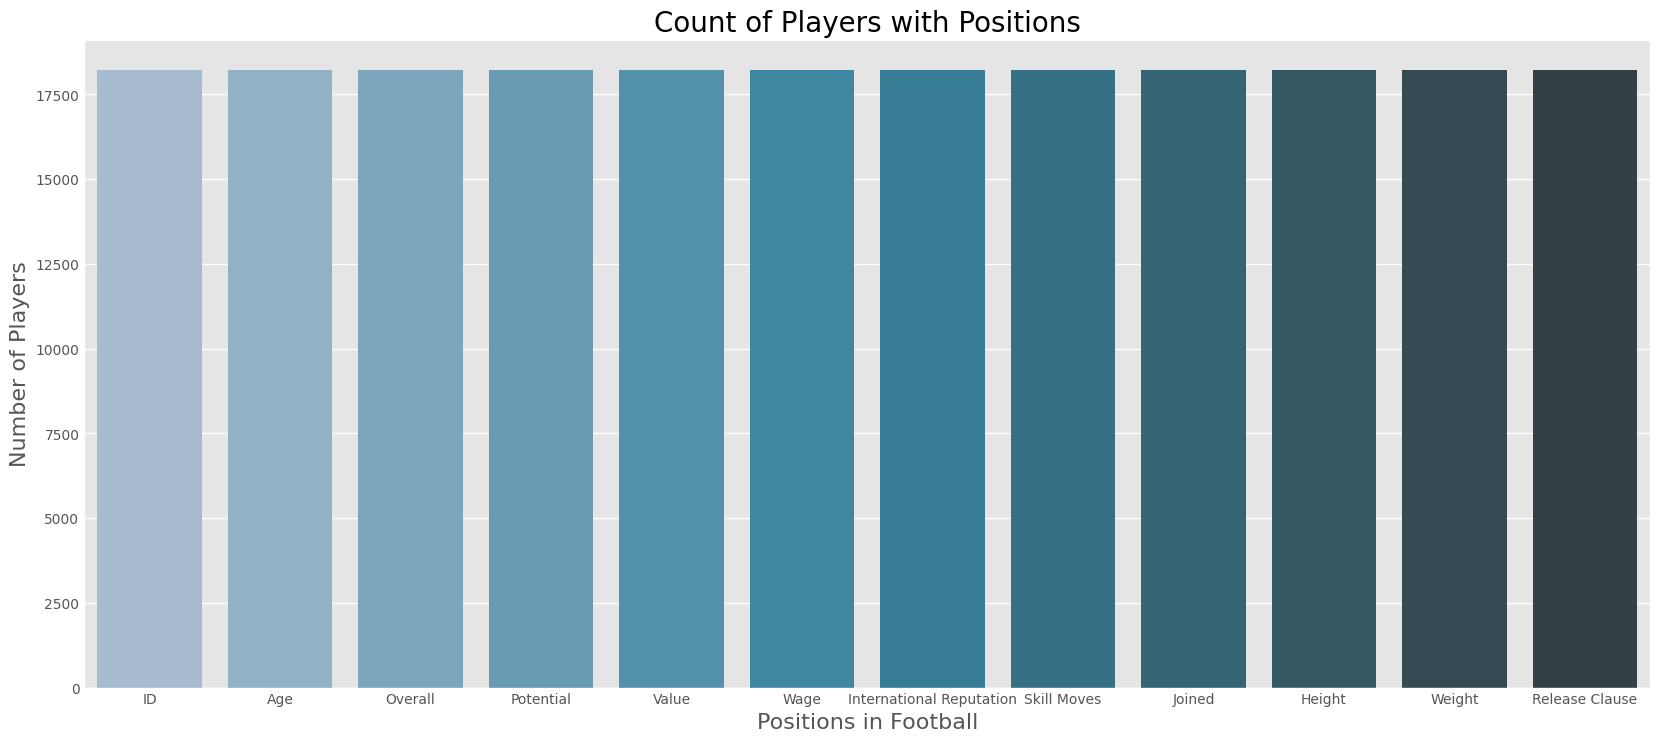

In [34]:
plt.figure(figsize = (18, 8))
plt.style.use('ggplot')
ax = sns.countplot(data = df, palette = 'PuBuGn_d')
ax.set_xlabel(xlabel = 'Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Count of Players with Positions', fontsize = 20)   
plt.show()

In [35]:
df['Nationality'].nunique()

164

In [36]:
df['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [37]:
top_countries = df['Nationality'].value_counts().head(10)

top_countries

Nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: count, dtype: int64

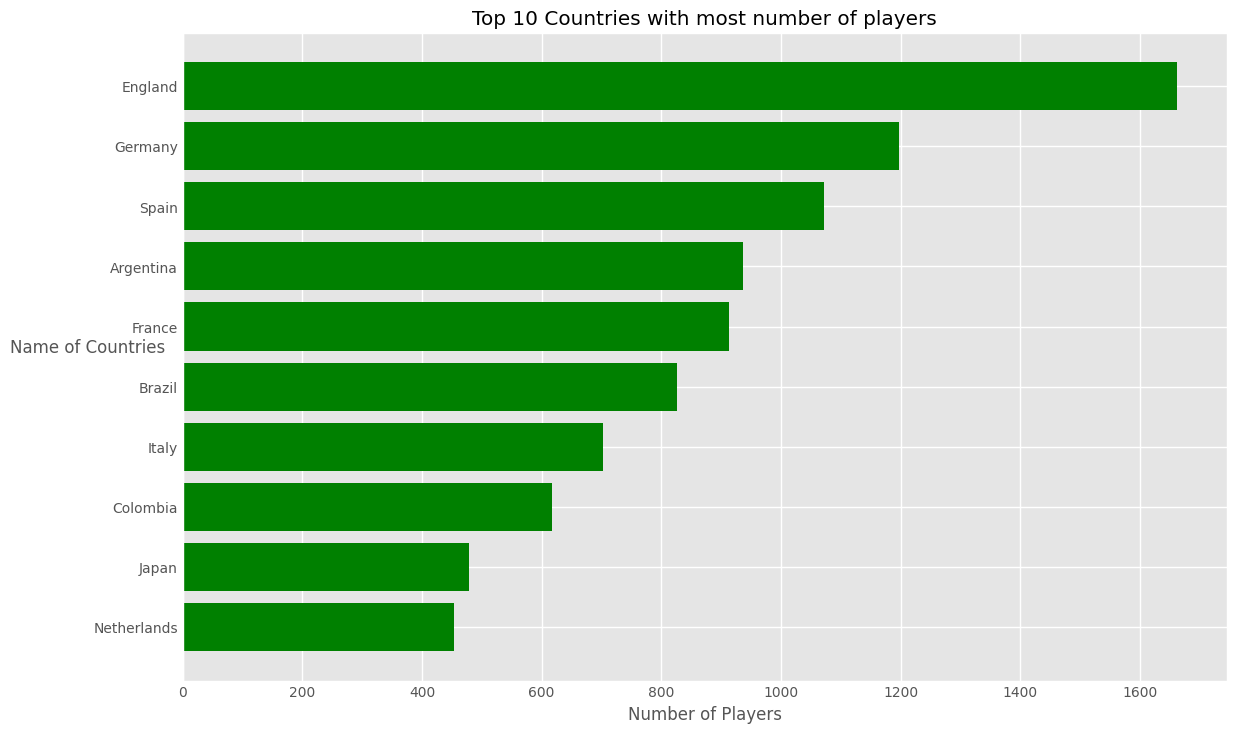

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
x = top_countries.values
y = top_countries.index
ax.barh(y, x, align='center', color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Players')
ax.set_ylabel('Name of Countries', rotation=0)
ax.set_title('Top 10 Countries with most number of players')
plt.show()

In [39]:
top_countries_name = top_countries.index

top_countries_name

Index(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands'],
      dtype='object', name='Nationality')

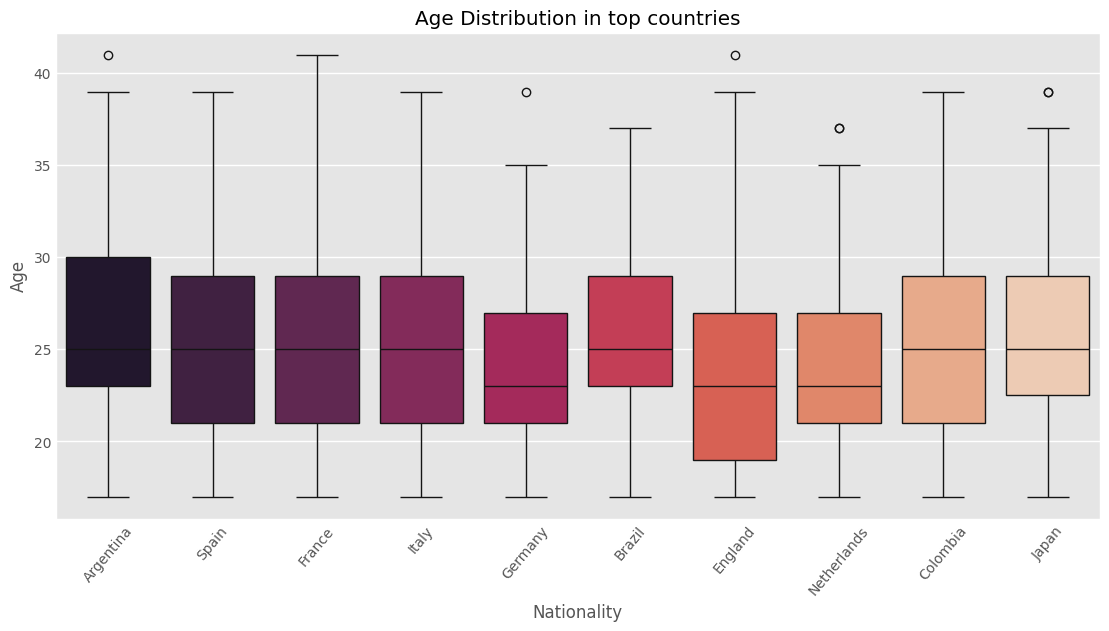

In [40]:
df_country_age = df.loc[df['Nationality'].isin(top_countries_name) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Nationality' , y = 'Age' , data = df_country_age, palette='rocket')
plt.title('Age Distribution in top countries')
plt.xticks(rotation = 50)
plt.show()

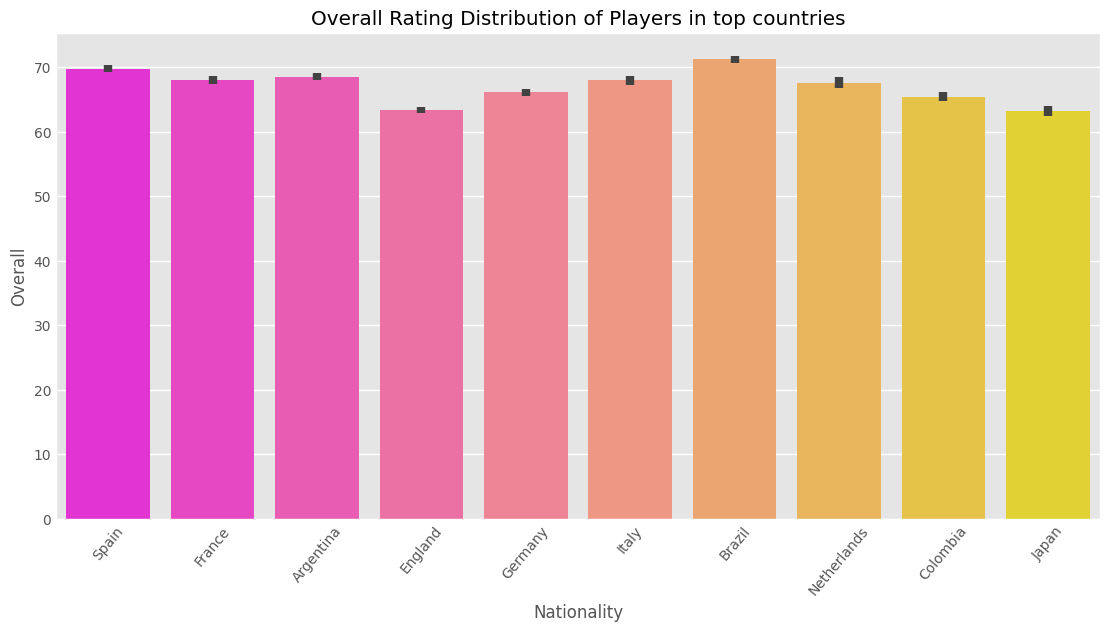

In [41]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_name) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Overall' , data = df_country_rating, palette='spring')
plt.title('Overall Rating Distribution of Players in top countries')
plt.xticks(rotation = 50)
plt.show()

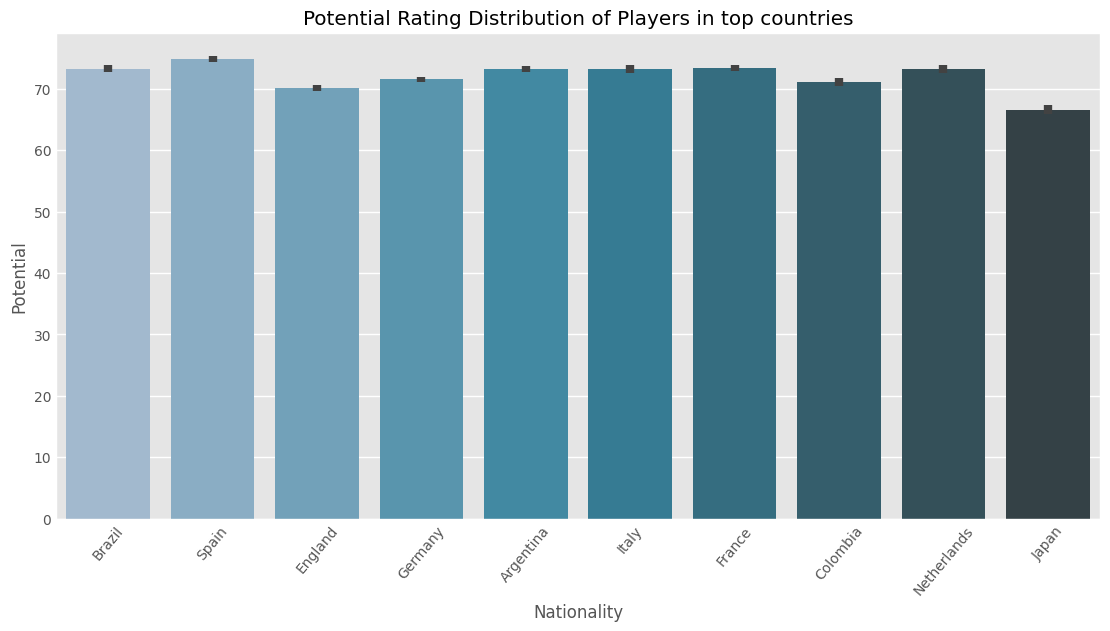

In [42]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_name) & df['Potential']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Potential' , data = df_country_rating, palette='PuBuGn_d')
plt.title('Potential Rating Distribution of Players in top countries')
plt.xticks(rotation = 50)
plt.show()

In [43]:
df['Club'].nunique()

652

In [44]:
df['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [45]:
clubs = ['FC Barcelona','Real Madrid','Juventus','Liverpool','Manchester United',
         'Chelsea','Arsenal','Paris Saint-Germain' ,'FC Bayern München','Manchester City']

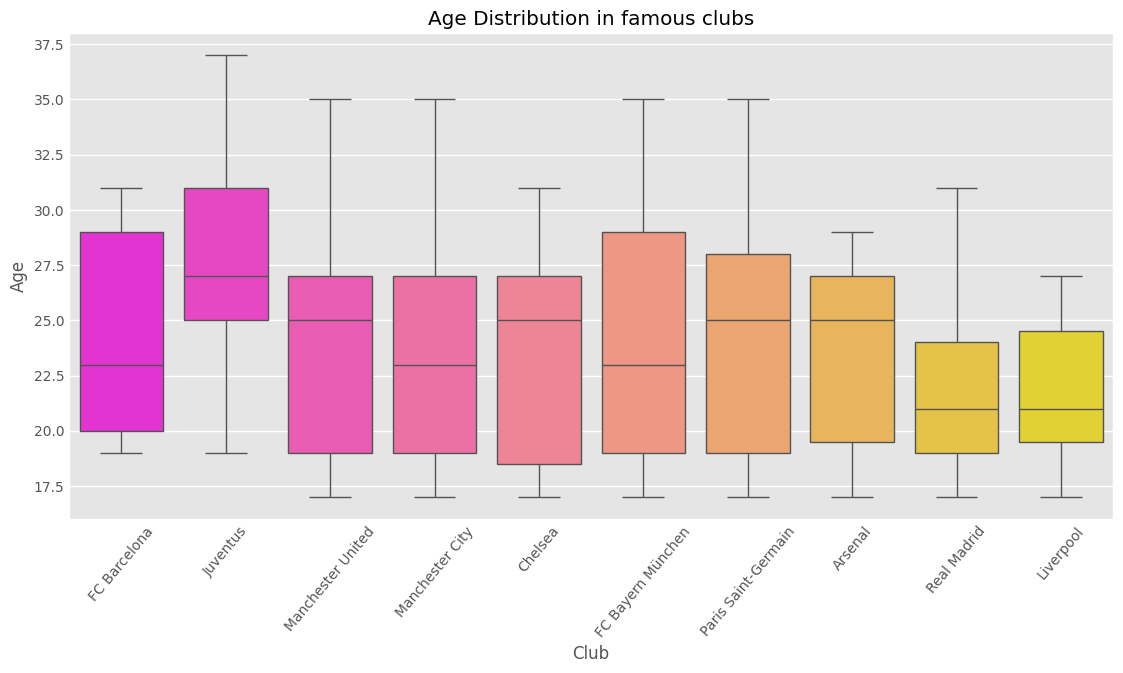

In [46]:
df_club_age = df.loc[df['Club'].isin(clubs) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club', y = 'Age' , data = df_club_age, palette='spring')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

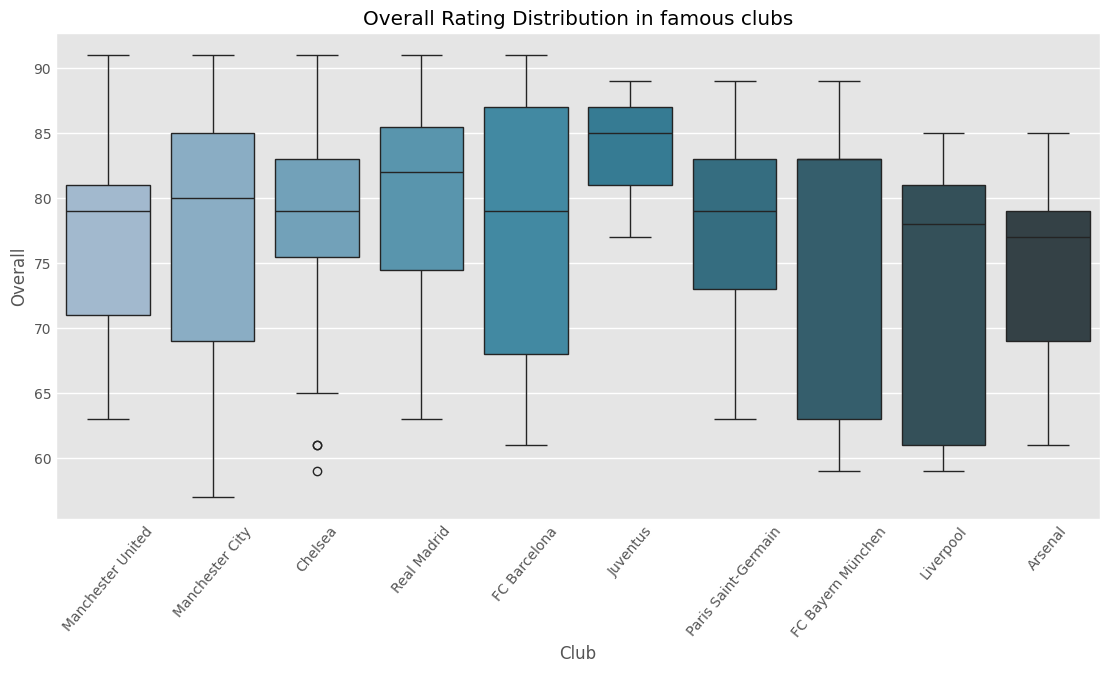

In [47]:
df_club_rating = df.loc[df['Club'].isin(clubs) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club' , y = 'Overall' , data = df_club_rating, palette='PuBuGn_d')
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

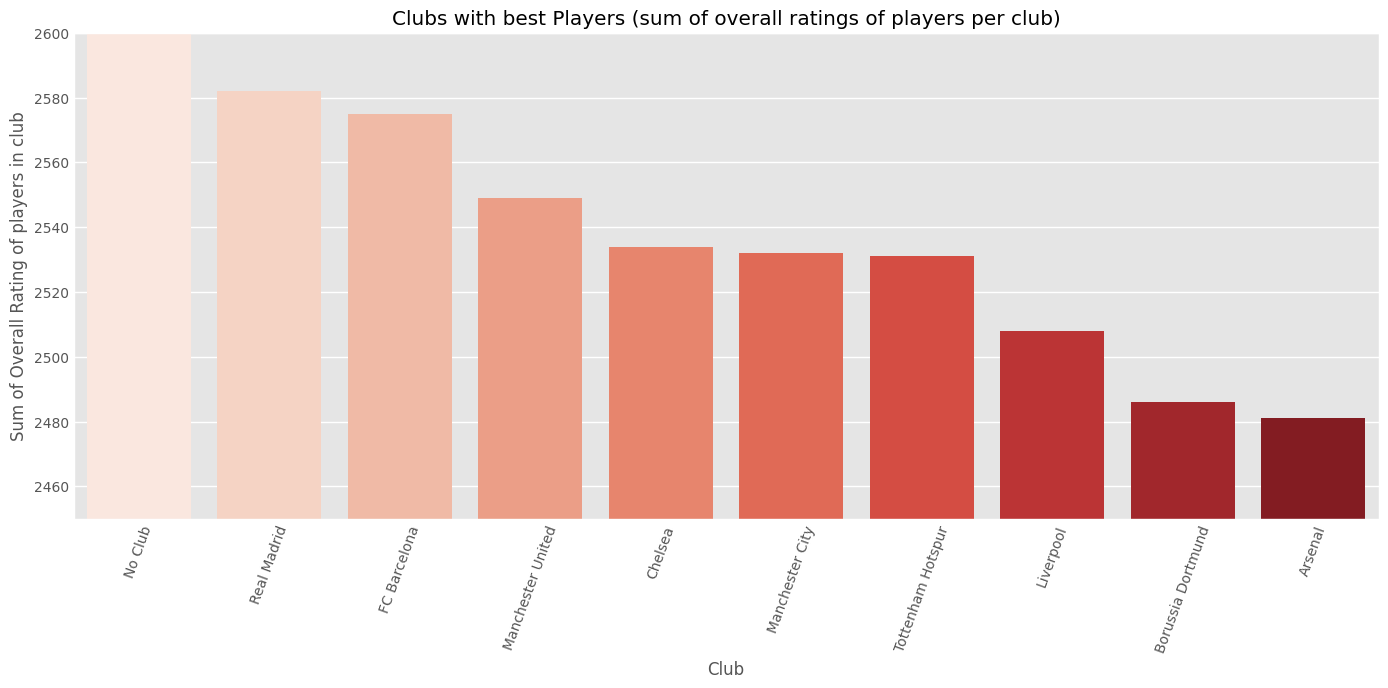

In [48]:
best_dict = {}
for club in df['Club'].unique():
    overall_rating = df['Overall'][df['Club'] == club].sum()
    best_dict[club] = overall_rating
best_club = pd.DataFrame.from_dict(best_dict, orient='index', columns = ['overall'])
best_club['club'] = best_club.index
best_club = best_club.sort_values(by = 'overall', ascending =  False)

plt.figure(1 , figsize = (15 , 6))
sns.barplot(x ='club',y ='overall',data = best_club.head(10),palette='Reds')  
plt.xticks(rotation = 70)
plt.xlabel("Club")
plt.ylabel('Sum of Overall Rating of players in club')
plt.title('Clubs with best Players (sum of overall ratings of players per club)')
plt.ylim(2450 , 2600)
plt.show()

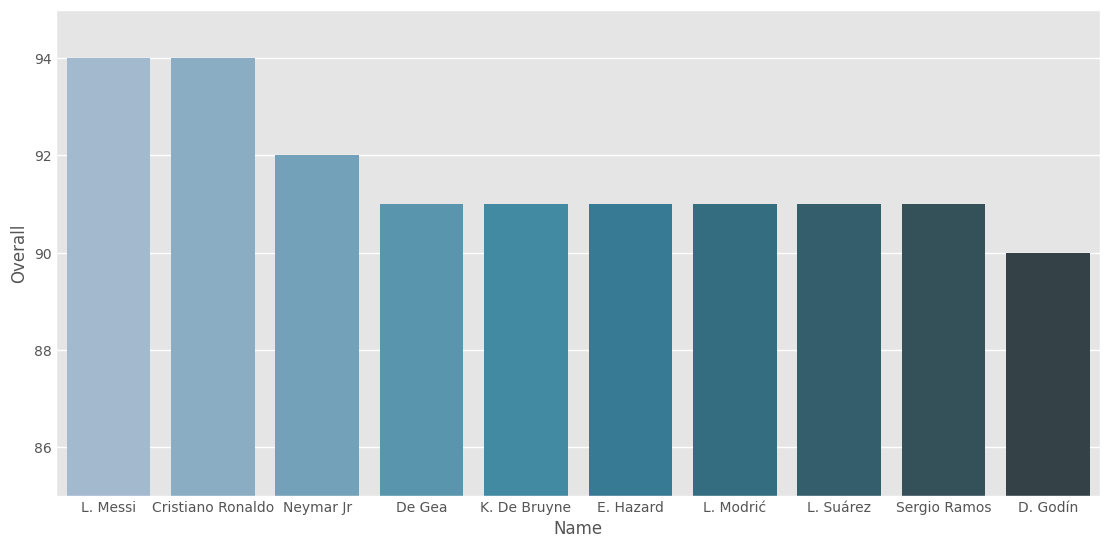

In [49]:
df_best_players = pd.DataFrame.copy(df.sort_values(by ='Overall',ascending = False ).head(10))
plt.figure(1,figsize = (12,6))
sns.barplot(x ='Name' , y = 'Overall' , data = df_best_players, palette='PuBuGn_d')
plt.ylim(85,95)
plt.show()

In [50]:
def normalizing_wage(x):
    if '€' in str(x) and 'M' in str(x):
        c = str(x).replace('€' , '')
        c = str(c).replace('M' , '')
        c = float(c) * 1000000

    else:
        c = str(x).replace('€' , '')
        c = str(c).replace('K' , '')
        c = float(c) * 1000

    return c

df['Normalized_Wage'] = df['Wage'].apply(lambda x : normalizing_wage(x))
df.sort_values(by = 'Normalized_Wage' , ascending = False)[['Name','Club','Nationality','Overall',
'Age','Normalized_Wage','Wage']].head(5)


,Name,Club,Nationality,Overall,Age,Normalized_Wage,Wage
0,L. Messi,FC Barcelona,Argentina,94,31,565000.0,565.0
7,L. Suárez,FC Barcelona,Uruguay,91,31,455000.0,455.0
6,L. Modrić,Real Madrid,Croatia,91,32,420000.0,420.0
1,Cristiano Ronaldo,Juventus,Portugal,94,33,405000.0,405.0
8,Sergio Ramos,Real Madrid,Spain,91,32,380000.0,380.0


In [51]:
df.sort_values(by = 'Age' , ascending = False)[['Name','Club','Nationality','Overall', 'Age' ]].head()

,Name,Club,Nationality,Overall,Age
4741,O. Pérez,Pachuca,Mexico,71,45
18183,K. Pilkington,Cambridge United,England,48,44
17726,T. Warner,Accrington Stanley,Trinidad & Tobago,53,44
10545,S. Narazaki,Nagoya Grampus,Japan,65,42
7225,C. Muñoz,CD Universidad de Concepción,Argentina,68,41


In [52]:
df.sort_values(by = 'Age' , ascending = True)[['Name','Club','Nationality','Overall', 'Age' ]].head()

,Name,Club,Nationality,Overall,Age
18206,G. Nugent,Tranmere Rovers,England,46,16
17743,J. Olstad,Sarpsborg 08 FF,Norway,52,16
13293,H. Massengo,AS Monaco,France,62,16
16081,J. Italiano,Perth Glory,Australia,58,16
18166,N. Ayéva,Örebro SK,Sweden,48,16
